In [ ]:
from google.colab import files
uploaded = files.upload()

Saving CocaCola_Sales_Rawdata (1).csv to CocaCola_Sales_Rawdata (1).csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models
from datetime import datetime,time
import warnings
import itertools
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
from pylab import rcParams
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf

In [ ]:
coke = pd.read_csv('CocaCola_Sales_Rawdata (1).csv')

In [ ]:
coke1 = coke.copy()

In [ ]:
coke1.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [ ]:
coke1.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [ ]:
coke1.dtypes

Quarter     object
Sales      float64
dtype: object

In [ ]:
coke1.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,42.0,2994.353308,977.930896,1547.818996,2159.714247,2782.376999,3609.25,5253.0


In [ ]:
temp = coke1.Quarter.str.replace(r'(Q\d)_(\d+)',r'19\2-\1')

In [ ]:
coke1['quater'] = pd.to_datetime(temp).dt.strftime('%b-%Y')

In [ ]:
coke1.head()

,Quarter,Sales,quater
0,Q1_86,1734.827000,Jan-1986
1,Q2_86,2244.960999,Apr-1986
2,Q3_86,2533.804993,Jul-1986
3,Q4_86,2154.962997,Oct-1986
4,Q1_87,1547.818996,Jan-1987


In [ ]:
coke1 = coke1.drop(['Quarter'], axis=1)

In [ ]:
coke1.reset_index(inplace=True)

In [ ]:
coke1['quater'] = pd.to_datetime(coke1['quater'])

In [ ]:
coke1 = coke1.set_index('quater')

In [ ]:
coke1.head()

,index,Sales
quater,,
1986-01-01,0,1734.827000
1986-04-01,1,2244.960999
1986-07-01,2,2533.804993
1986-10-01,3,2154.962997
1987-01-01,4,1547.818996


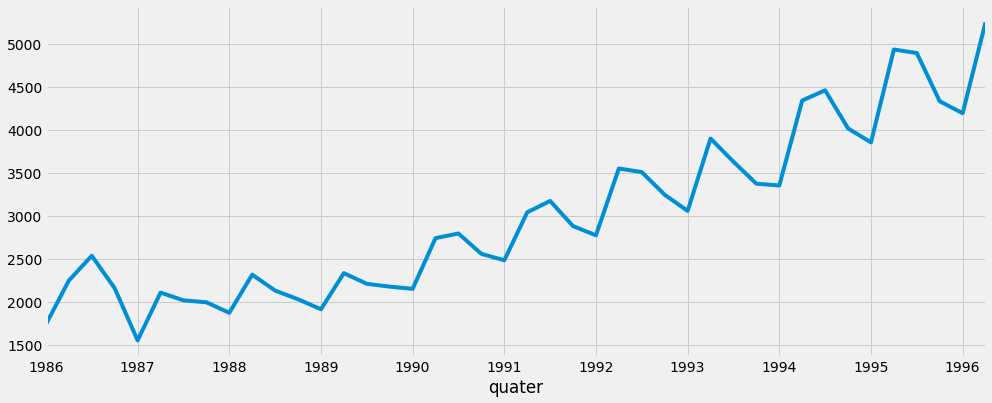

In [ ]:
coke1['Sales'].plot(figsize=(15, 6))
plt.show()

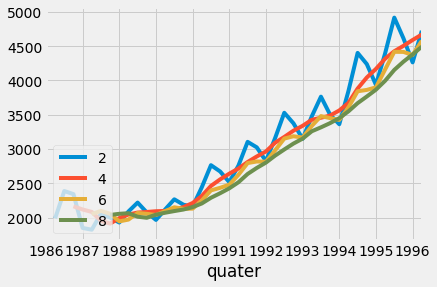

In [ ]:
for i in range(2,10,2):
  coke1["Sales"].rolling(i).mean().plot(label=str(i))
  
plt.legend(loc=3)

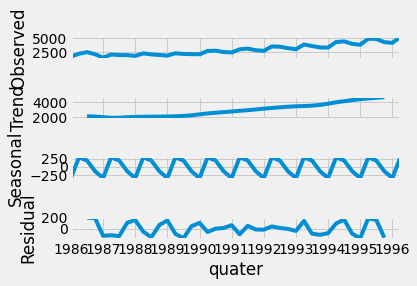

In [ ]:
ts_add = seasonal_decompose(coke1.Sales,model="additive")
fig = ts_add.plot()
plt.show()

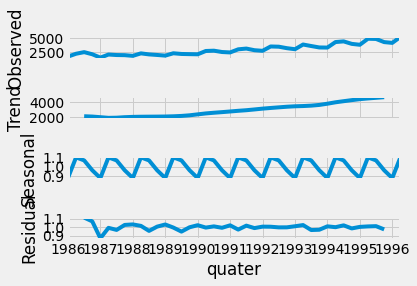

In [ ]:
ts_mul = seasonal_decompose(coke1.Sales,model="multiplicative")
fig = ts_mul.plot()
plt.show()

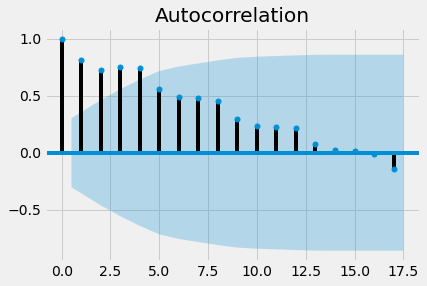

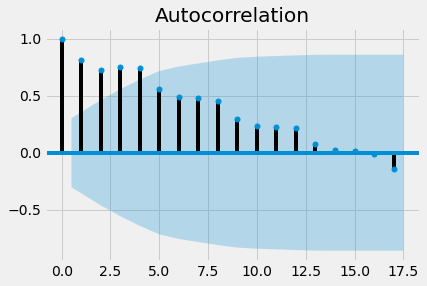

In [ ]:
tsa_plots.plot_acf(coke1.Sales)

Building Time series forecasting with ARIMA

In [ ]:
X = coke1['Sales'].values

In [ ]:
size = int(len(X) * 0.66)

In [ ]:
train, test = X[0:size], X[size:len(X)]

In [ ]:
model = ARIMA(train, order=(5,1,0))

In [ ]:
model_fit = model.fit(disp=0)

In [ ]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   26
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -172.036
Method:                       css-mle   S.D. of innovations            163.191
Date:                Mon, 07 Mar 2022   AIC                            358.071
Time:                        08:24:30   BIC                            366.878
Sample:                             1   HQIC                           360.607
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.8435     26.509      1.578      0.130     -10.112      93.799
ar.L1.D.y     -0.1479      0.195     -0.758      0.457      -0.530       0.234
ar.L2.D.y     -0.3127      0.157     -1.996      0.0

Summarizes the coefficient values used as well as the skill of the fit on the sample observations

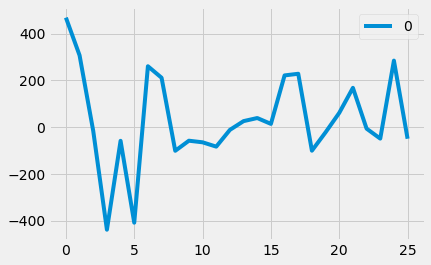

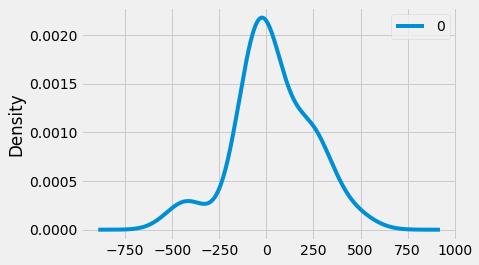

                0
count   26.000000
mean    31.325758
std    202.029748
min   -438.904761
25%    -58.603083
50%     -9.190508
75%    200.236145
max    468.290498


In [ ]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())



*   The plot of the residual errors suggests that there may still be some trend information not captured by the model
*   The results show that indeed there is a bias in the prediction (a non-zero mean in the residuals)



**Rolling Forecast ARIMA Model**

In [ ]:
history = [x for x in train]

In [ ]:
predictions = list()

In [ ]:
for t in range(len(test)):
  model = ARIMA(history, order=(5,1,0))
  model_fit = model.fit(disp=0)
  output = model_fit.forecast()
  yhat = output[0]
  predictions.append(yhat)
  obs = test[t]
  history.append(obs)
  print('predicted=%f, expected=%f' % (yhat, obs))

predicted=3135.586446, expected=3243.859993
predicted=3188.847167, expected=3056.000000
predicted=3734.224287, expected=3899.000000
predicted=3782.620248, expected=3629.000000
predicted=3355.125605, expected=3373.000000
predicted=3297.217715, expected=3352.000000
predicted=4112.813823, expected=4342.000000
predicted=3961.043703, expected=4461.000000
predicted=4130.787674, expected=4017.000000
predicted=3912.795370, expected=3854.000000
predicted=4687.044239, expected=4936.000000
predicted=4970.518935, expected=4895.000000
predicted=4384.039806, expected=4333.000000
predicted=4207.687591, expected=4194.000000
predicted=5261.673301, expected=5253.000000


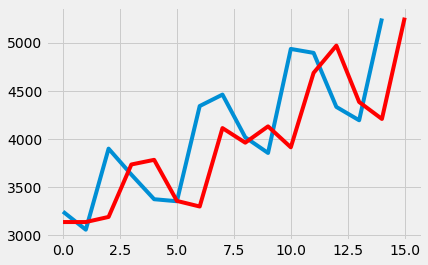

In [ ]:
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

A line plot is created showing the expected values (blue) compared to the rolling forecast predictions (red). We can see the values show some trend and are in the correct scale

**Comparing Multiple Models**

In [ ]:
coke2 = pd.get_dummies(coke, columns =['Quarter'])

In [ ]:
coke2.columns = ['Sales','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4']

In [ ]:
coke2.head()

,Sales,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,...,Q4,Q4,Q4,Q4,Q4,Q4,Q4,Q4,Q4,Q4
0,1734.827000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2244.960999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2533.804993,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2154.962997,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1547.818996,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
t = np.arange(1,43)

In [ ]:
coke2['t'] = t

In [ ]:
coke2['t_sq'] = coke2['t']*coke2['t']

In [ ]:
log_Sales = np.log(coke2['Sales'])

In [ ]:
coke2['log_Sales']=log_Sales

In [ ]:
coke2.head()

,Sales,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,...,Q4,Q4,Q4,Q4,Q4,Q4,Q4,t,t_sq,log_Sales
0,1734.827000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,7.458663
1,2244.960999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,4,7.716443
2,2533.804993,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,9,7.837477
3,2154.962997,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,16,7.675529
4,1547.818996,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,25,7.344602


In [ ]:
train1, test1 = np.split(coke2, [int(.67*len(coke2))])

In [ ]:
linear = smf.ols('Sales ~ t', data=train1).fit()
predlin=pd.Series(linear.predict(pd.DataFrame(test1['t'])))
rmselin=np.sqrt((np.mean(np.array(test1['Sales'])-np.array(predlin))**2))
rmselin

580.1224131670774

In [ ]:
quad=smf.ols('Sales~t+t_sq', data=train1).fit()
predquad=pd.Series(quad.predict(pd.DataFrame(test1[['t', 't_sq']])))
rmsequad=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(predquad))**2))
rmsequad

783.7297975323926

In [ ]:
expo=smf.ols('log_Sales~t', data=train1).fit()
predexp=pd.Series(expo.predict(pd.DataFrame(test1['t'])))
rmseexpo=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(predexp)))**2))
rmseexpo

588.140510563996

In [ ]:
additive=smf.ols('Sales~ Q1+Q2+Q3+Q4',data=train1).fit()
predadd=pd.Series(additive.predict(pd.DataFrame(test1[['Q1','Q2','Q3','Q4']])))
rmseadd=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(predadd))**2))
rmseadd

1869.7188208994435

In [ ]:
addlinear= smf.ols('Sales~t+Q1+Q2+Q3+Q4',data=train1).fit()
predaddlinear=pd.Series(addlinear.predict(pd.DataFrame(test1[['t','Q1','Q2','Q3','Q4']])))
rmseaddlinear=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(predaddlinear))**2))
rmseaddlinear

596.1526282860351

In [ ]:
addquad=smf.ols('Sales~t+t_sq+Q1+Q2+Q3+Q4',data=train1).fit()
predaddquad=pd.Series(addquad.predict(pd.DataFrame(test1[['t','t_sq','Q1','Q2','Q3','Q4']])))
rmseaddquad=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(predaddquad))**2))
rmseaddquad


412.11444360838345

In [ ]:
mulsea=smf.ols('log_Sales~Q1+Q2+Q3+Q4',data=train1).fit()
predmul= pd.Series(mulsea.predict(pd.DataFrame(test1[['Q1','Q2','Q3','Q4']])))
rmsemul= np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(predmul)))**2))
rmsemul

2374.9194407822497

In [ ]:
mullin= smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data=train1).fit()
predmullin= pd.Series(mullin.predict(pd.DataFrame(test1[['t','Q1','Q2','Q3','Q4']])))
rmsemulin=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(predmullin)))**2))
rmsemulin

5359.687911700773

In [ ]:
mul_quad= smf.ols('log_Sales~t+t_sq+Q1+Q2+Q3+Q4',data=train1).fit()
pred_mul_quad= pd.Series(mul_quad.predict(test1[['t','t_sq','Q1','Q2','Q3','Q4']]))
rmse_mul_quad=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(pred_mul_quad)))**2))
rmse_mul_quad

3630.561946727218

**Conclusion**

In [ ]:
output = {'Model':pd.Series(['rmse_mul_quad','rmseadd','rmseaddlinear','rmseaddquad','rmseexpo','rmselin','rmsemul','rmsemulin','rmsequad']),
          'Values':pd.Series([rmse_mul_quad,rmseadd,rmseaddlinear,rmseaddquad,rmseexpo,rmselin,rmsemul,rmsemulin,rmsequad])}

In [ ]:
rmse=pd.DataFrame(output)

In [ ]:
print(rmse)

           Model       Values
0  rmse_mul_quad  3630.561947
1        rmseadd  1869.718821
2  rmseaddlinear   596.152628
3    rmseaddquad   412.114444
4       rmseexpo   588.140511
5        rmselin   580.122413
6        rmsemul  2374.919441
7      rmsemulin  5359.687912
8       rmsequad   783.729798


Additive seasonality with quadratic trend has the best RMSE value